## Obtener datos de los satélites
Se incializa la librería

In [16]:
import ee
import geemap
import geopandas as gpd
from ipyleaflet import GeoJSON
from zipfile import ZipFile
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from extract_data import *

ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AWtgzh5gqge1tg3Z6r1MkOYUI42lEf9RhQd_6JUuaGlaUilbVoVJ_Fb96lQ



Successfully saved authorization token.


# Creacion de los diccionarios que contienen la información

In [44]:
#region de interes---------------------------------------------------------------------
region = ee.Geometry.Rectangle(-74.638, 3.571, -73.710, 5.057)

#extracción de datos-------------------------------------------------------------------
ERA5_radiacion = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Radiación solar superficial neta mensual',
    'band' : 'surface_net_solar_radiation_sum',
    'units' : ' [ J/m2 ]',
    'max_value' : 430e6,
    'min_value' : 350e6,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_velu = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Componente x de velocidad',
    'band' : 'u_component_of_wind_10m',
    'units' : ' [ m/s ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_velv = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Componente y de velocidad',
    'band' : 'v_component_of_wind_10m',
    'units' : ' [ m/s ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

IDAHO_vel = {
    'source' : 'IDAHO_EPSCOR/TERRACLIMATE',
    'variable' : 'Velocidad total promedio mensual a 10m',
    'band' : 'vs',
    'units' : ' [ m/s ]',
    'max_value' : 20,
    'min_value' : 100,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

Solarcast_vel = {
    'source' : 'projects/ee-seforeros/assets/PVOUT',
    'variable' : 'Potencial de energía fotovoltaica',
    'units' : ' [ kWh ]',
    'max_value' : 1000,
    'min_value' : 2000,
    'start' : '2018-03-01',
    'end' : '2018-04-01'
}

scale_value = 5000

# Extracción de datos

In [209]:
df_ERA5_radiacion = collection_data(ERA5_radiacion, region, scale_value)
df_ERA5_radiacion = df_ERA5_radiacion.loc[df_ERA5_radiacion['datetime'] == ERA5_radiacion.get('start')] #primer valor de ejemplo

df_ERA5_velu = collection_data(ERA5_velu, region, scale_value)
df_ERA5_velu = df_ERA5_velu.loc[df_ERA5_velu['datetime'] == ERA5_velu.get('start')]

df_ERA5_velv = collection_data(ERA5_velv, region, scale_value)
df_ERA5_velv = df_ERA5_velv.loc[df_ERA5_velv['datetime'] == ERA5_velv.get('start')]

#df_IDAHO_vel = collection_data(IDAHO_vel, region, scale_value)

# Gráfico de datos

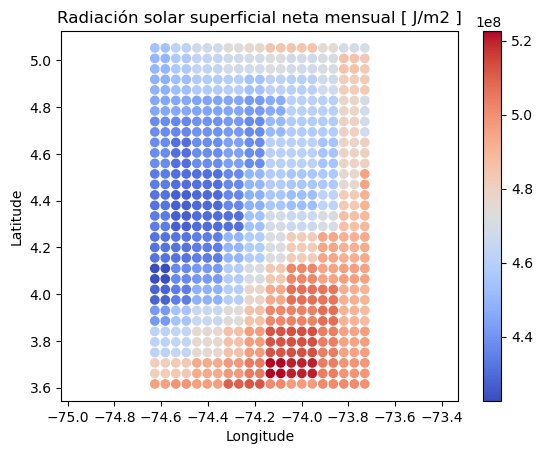

In [210]:
df = df_ERA5_radiacion
dic = ERA5_radiacion

min = df[dic.get('band')].min()
max = df[dic.get('band')].max()

fig, ax = plt.subplots()
ax.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax.set_title(dic.get('variable')+dic.get('units'))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('equal')
#colobar and range
fig.colorbar(scatter, ax=ax)
scatter.set_clim(min, max)
# Show the plot
plt.show()

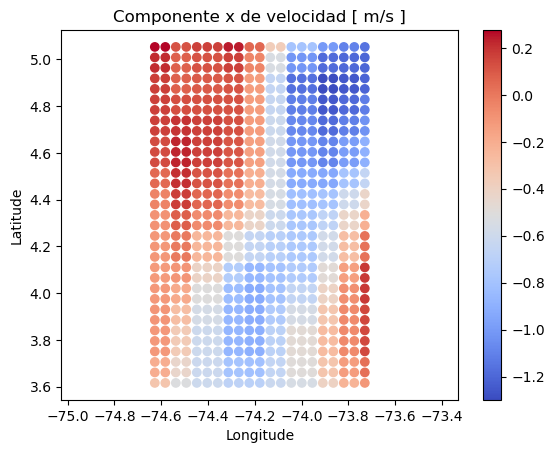

In [211]:
df = df_ERA5_velu
dic = ERA5_velu

min = df[dic.get('band')].min()
max = df[dic.get('band')].max()

fig, ax = plt.subplots()
ax.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax.set_title(dic.get('variable')+dic.get('units'))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('equal')
#colobar and range
fig.colorbar(scatter, ax=ax)
scatter.set_clim(min, max)
# Show the plot
plt.show()

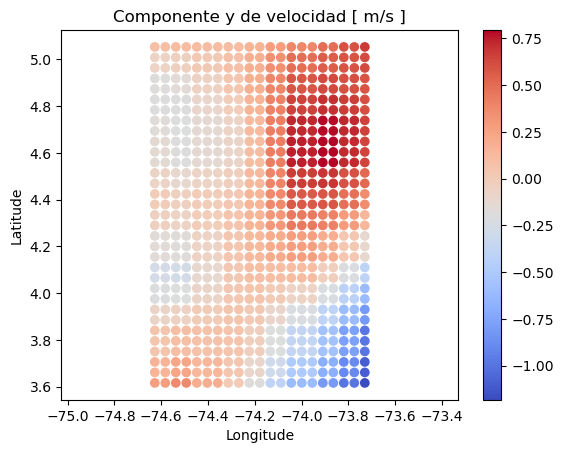

In [213]:
df = df_ERA5_velv
dic = ERA5_velv

min = df[dic.get('band')].min()
max = df[dic.get('band')].max()

fig, ax = plt.subplots()
ax.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax.set_title(dic.get('variable')+dic.get('units'))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('equal')
#colobar and range
fig.colorbar(scatter, ax=ax)
scatter.set_clim(min, max)
# Show the plot
plt.show()